# Data Description

# Importing Required Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
df=pd.read_csv("https://github.com/dsrscientist/DSData/raw/master/happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [5]:
df.shape

(158, 12)

In [6]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

We have a 158 rows and 12 column.

In [7]:
#Checking the Null value in dataset
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

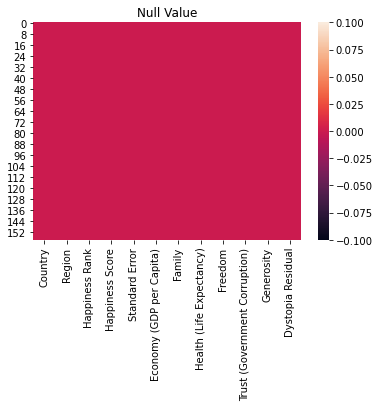

In [8]:
sns.heatmap(df.isnull())
plt.title("Null Value")
plt.show()

We don't have a null value in the dataset

In [9]:
from sklearn.preprocessing import LabelEncoder

DT=df.apply(LabelEncoder().fit_transform)
DT.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,135,9,0,156,19,151,154,148,156,150,115,125
1,58,9,1,155,100,136,157,150,143,98,144,134
2,37,9,2,154,16,139,155,128,151,153,129,122
3,105,9,3,153,50,153,152,132,157,143,132,118
4,24,5,4,152,26,140,151,140,145,141,145,116


In [26]:
DT.shape

(158, 12)

In [12]:
DT.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,78.018987,77.981013,75.917722,78.500000,78.500000,78.430380,78.500000,78.392405,78.500000,78.500000
std,45.754781,2.993321,45.321705,45.321705,43.888098,45.754781,45.754781,45.642807,45.754781,45.588695,45.754781,45.754781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.250000,3.000000,39.250000,39.250000,39.250000,39.250000,39.250000,39.250000,39.250000,39.250000,39.250000,39.250000
50%,78.500000,4.500000,78.500000,77.500000,76.000000,78.500000,78.500000,78.500000,78.500000,78.500000,78.500000,78.500000
75%,117.750000,8.000000,116.750000,116.750000,112.750000,117.750000,117.750000,117.750000,117.750000,117.750000,117.750000,117.750000
max,157.000000,9.000000,156.000000,156.000000,152.000000,157.000000,157.000000,156.000000,157.000000,156.000000,157.000000,157.000000


Converting the string into int

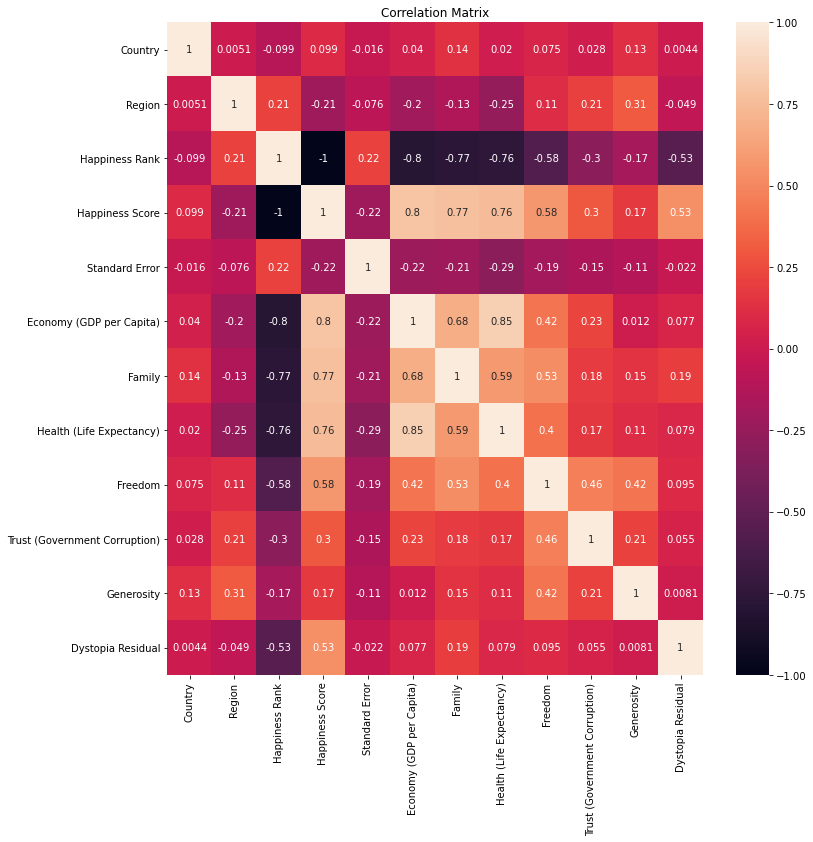

In [27]:
corr_mat=DT.corr()

plt.figure(figsize=[12,12])
sns.heatmap(corr_mat,annot=True)
plt.title("Correlation Matrix")
plt.show()

In [28]:
corr_matrix=DT.corr()
corr_matrix["Country"].sort_values(ascending=False)

Country                          1.000000
Family                           0.137555
Generosity                       0.125607
Happiness Score                  0.098804
Freedom                          0.075142
Economy (GDP per Capita)         0.040092
Trust (Government Corruption)    0.027665
Health (Life Expectancy)         0.020416
Region                           0.005092
Dystopia Residual                0.004352
Standard Error                  -0.015756
Happiness Rank                  -0.098804
Name: Country, dtype: float64

In [35]:
#Spliting the independent and target variable in X and Y
x = DT.drop("Happiness Rank",axis=1)
y=DT["Happiness Rank"]

In [31]:
x.skew()

Region                          -0.116119
Happiness Rank                  -0.001271
Happiness Score                  0.001271
Standard Error                   0.002827
Economy (GDP per Capita)         0.000000
Family                           0.000000
Health (Life Expectancy)        -0.007319
Freedom                          0.000000
Trust (Government Corruption)   -0.009927
Generosity                       0.000000
Dystopia Residual                0.000000
dtype: float64

We don't have any skewness here

# Checking Outlier

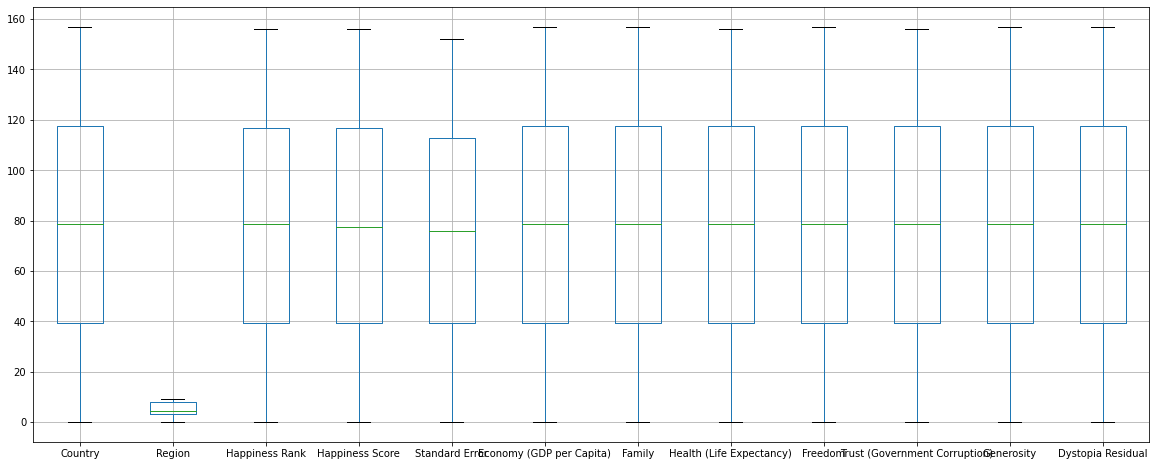

In [33]:
DT.iloc[:,0:12].boxplot(figsize=[20,8])
plt.show()

# Findig the best random State

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range (1,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf=LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best Accuracy is",maxAccu,"on Random state",maxRS)

Best Accuracy is 0 on Random state 0


In [ ]:
Score is getting zero for both. further step not required here.